<a href="https://colab.research.google.com/github/SidWorks01/MultiClassClassifier/blob/main/ProjectDSG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install Dependecies

In [ ]:
!pip install pandas-profiling numpy matplotlib seaborn --quiet
!pip install opendatasets scikit-learn  --quiet --upgrade
!pip install kneed
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 13.4 MB/s eta 0:00:00


### Import Dependencies

In [ ]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Read Data

In [ ]:
od.download('https://www.kaggle.com/competitions/beginners-hypothesis-2023/data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: minemaster01
Your Kaggle Key: ··········


100%|██████████| 103k/103k [00:00<00:00, 28.1MB/s]


Extracting archive ./beginners-hypothesis-2023/beginners-hypothesis-2023.zip to ./beginners-hypothesis-2023


In [ ]:
os.listdir('beginners-hypothesis-2023')

['sample_submission.csv', 'train.csv', 'test.csv']

In [ ]:
df = pd.read_csv('/content/beginners-hypothesis-2023/train.csv')

In [ ]:
dft=pd.read_csv('/content/beginners-hypothesis-2023/test.csv')

In [ ]:
df

,radio_frequency,B_field,capture_rad,ang_class,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,b_class,target
0,28.744706,3.590000e-09,19.592496,alpha,NaN,23.994950,NaN,34.939900,25.511543,3.0,Alpha Boreas
1,44.166331,4.510000e-09,43.004674,alpha,28.397134,28.943042,4230.266381,28.181097,26.047880,2.0,Alpha Boreas
2,30.834897,4.410000e-09,33.429970,alpha,NaN,37.999181,6237.993588,29.577628,30.748244,2.0,Beta Eioneous
3,17.479827,3.540000e-09,12.976150,alpha,41.986773,17.683204,NaN,40.623018,29.488469,3.0,Zeta Draconis
4,30.268452,3.800000e-09,26.458232,alpha,11.548628,21.498649,6237.993588,25.976439,27.169169,2.0,Zeta Draconis
...,...,...,...,...,...,...,...,...,...,...,...
1995,41.551013,4.420000e-09,33.146966,alpha,24.282921,21.694687,2818.571131,22.299077,NaN,2.0,Gamma Saggita
1996,31.104158,3.000000e-09,43.004674,alpha,16.859181,31.464783,4178.867596,22.679037,24.569472,2.0,Alpha Boreas
1997,NaN,4.450000e-09,18.849264,alpha,18.108120,40.557671,4528.968755,NaN,22.913804,2.0,Alpha Boreas
1998,37.997708,3.640000e-09,20.748943,alpha,39.666448,41.473909,3832.446538,19.432455,25.480769,3.0,Beta Eioneous


Checking Unique Values in the Data

In [ ]:
df.nunique()

radio_frequency     1601
B_field              277
capture_rad         1598
ang_class              1
dist_from_obs_ly    1587
star1_redshift      1567
luminosity          1577
star2_redshift      1569
ext_temp            1575
b_class                3
target                 5
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   radio_frequency   1872 non-null   float64
 1   B_field           1866 non-null   float64
 2   capture_rad       1876 non-null   float64
 3   ang_class         1859 non-null   object 
 4   dist_from_obs_ly  1876 non-null   float64
 5   star1_redshift    1846 non-null   float64
 6   luminosity        1855 non-null   float64
 7   star2_redshift    1867 non-null   float64
 8   ext_temp          1863 non-null   float64
 9   b_class           1861 non-null   float64
 10  target            2000 non-null   object 
dtypes: float64(9), object(2)
memory usage: 172.0+ KB


Dropping Features that dont affect classification

In [ ]:
df=df.drop(['ang_class'], axis=1)

In [ ]:
dft=dft.drop(['ang_class'], axis=1)

Map Target data to Numeric Values

In [ ]:
df["target"] = df["target"].map({"Alpha Boreas": 1, "Beta Eioneous": 2,"Zeta Draconis":3,'Gamma Saggita':4,'Alpha Hemithea':5})

In [ ]:
dft

,radio_frequency,B_field,capture_rad,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,b_class
0,13.847038,3.420000e-09,35.892849,42.190316,19.317659,5030.024313,41.062202,16.519720,2
1,17.357120,2.160000e-09,40.926183,29.073718,26.641200,4189.809739,36.989132,30.487612,3
2,45.458139,4.020000e-09,25.771537,15.126236,34.508841,4766.252434,26.678785,29.433535,3
3,13.459710,2.170000e-09,33.077063,41.986773,20.032369,5084.220616,30.830743,31.030701,3
4,27.787212,2.150000e-09,24.157264,41.986773,18.400701,2158.500688,18.289046,31.333728,3
...,...,...,...,...,...,...,...,...,...
495,30.268835,3.790000e-09,43.004674,23.244364,29.226268,4739.416892,37.990132,23.608112,2
496,38.148344,3.910000e-09,24.950179,41.986773,35.643537,6211.252410,29.525682,33.393150,2
497,34.173976,4.450000e-09,26.422615,20.394055,31.607640,5376.443164,40.623018,27.622435,2
498,33.158077,4.630000e-09,43.004674,33.954285,41.343852,3045.215072,21.629922,16.519720,3


In [ ]:
df


In [ ]:
df.info()
df.nunique()


Spitting target and input

In [ ]:
x=df.iloc[:,:9]

In [ ]:
x


,radio_frequency,B_field,capture_rad,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,b_class
0,28.744706,3.590000e-09,19.592496,NaN,23.994950,NaN,34.939900,25.511543,3.0
1,44.166331,4.510000e-09,43.004674,28.397134,28.943042,4230.266381,28.181097,26.047880,2.0
2,30.834897,4.410000e-09,33.429970,NaN,37.999181,6237.993588,29.577628,30.748244,2.0
3,17.479827,3.540000e-09,12.976150,41.986773,17.683204,NaN,40.623018,29.488469,3.0
4,30.268452,3.800000e-09,26.458232,11.548628,21.498649,6237.993588,25.976439,27.169169,2.0
...,...,...,...,...,...,...,...,...,...
1995,41.551013,4.420000e-09,33.146966,24.282921,21.694687,2818.571131,22.299077,NaN,2.0
1996,31.104158,3.000000e-09,43.004674,16.859181,31.464783,4178.867596,22.679037,24.569472,2.0
1997,NaN,4.450000e-09,18.849264,18.108120,40.557671,4528.968755,NaN,22.913804,2.0
1998,37.997708,3.640000e-09,20.748943,39.666448,41.473909,3832.446538,19.432455,25.480769,3.0


In [ ]:
y=df.iloc[:,-1]

In [ ]:
y


0       1
1       1
2       2
3       3
4       3
       ..
1995    4
1996    1
1997    1
1998    2
1999    3
Name: target, Length: 2000, dtype: int64

In [ ]:
cols = x.select_dtypes(include=np.number).columns.tolist()
x[cols].describe()

,radio_frequency,B_field,capture_rad,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,b_class
count,1872.000000,1.866000e+03,1876.000000,1876.000000,1846.000000,1855.000000,1867.000000,1863.000000,1861.000000
mean,31.729053,3.519143e-09,28.474961,28.734954,30.654946,4462.704531,29.569576,24.955948,2.383127
std,9.145522,6.894767e-10,9.748533,9.674009,8.481606,1306.106118,8.409417,6.484121,0.570715
min,10.179352,1.550000e-09,5.642036,5.269586,7.934100,989.813929,4.913787,3.186136,1.000000
25%,23.466124,2.940000e-09,19.984675,19.639269,23.098774,3281.081340,21.975003,19.418229,2.000000
50%,31.573714,3.520000e-09,26.902806,27.746257,30.555531,4413.385397,29.154147,25.010227,2.000000
75%,39.605217,4.060000e-09,36.428346,37.573763,37.850177,5571.096494,36.620527,30.152981,3.000000
max,52.839049,5.240000e-09,56.086366,55.330846,52.109993,7294.920570,50.908293,41.872157,3.000000


## EDA

In [ ]:
import plotly.express as px


In [ ]:
px.histogram(df, x='b_class', title='')

In [ ]:
df.isnull().sum()

radio_frequency     128
B_field             134
capture_rad         124
dist_from_obs_ly    124
star1_redshift      154
luminosity          145
star2_redshift      133
ext_temp            137
b_class             139
target                0
dtype: int64

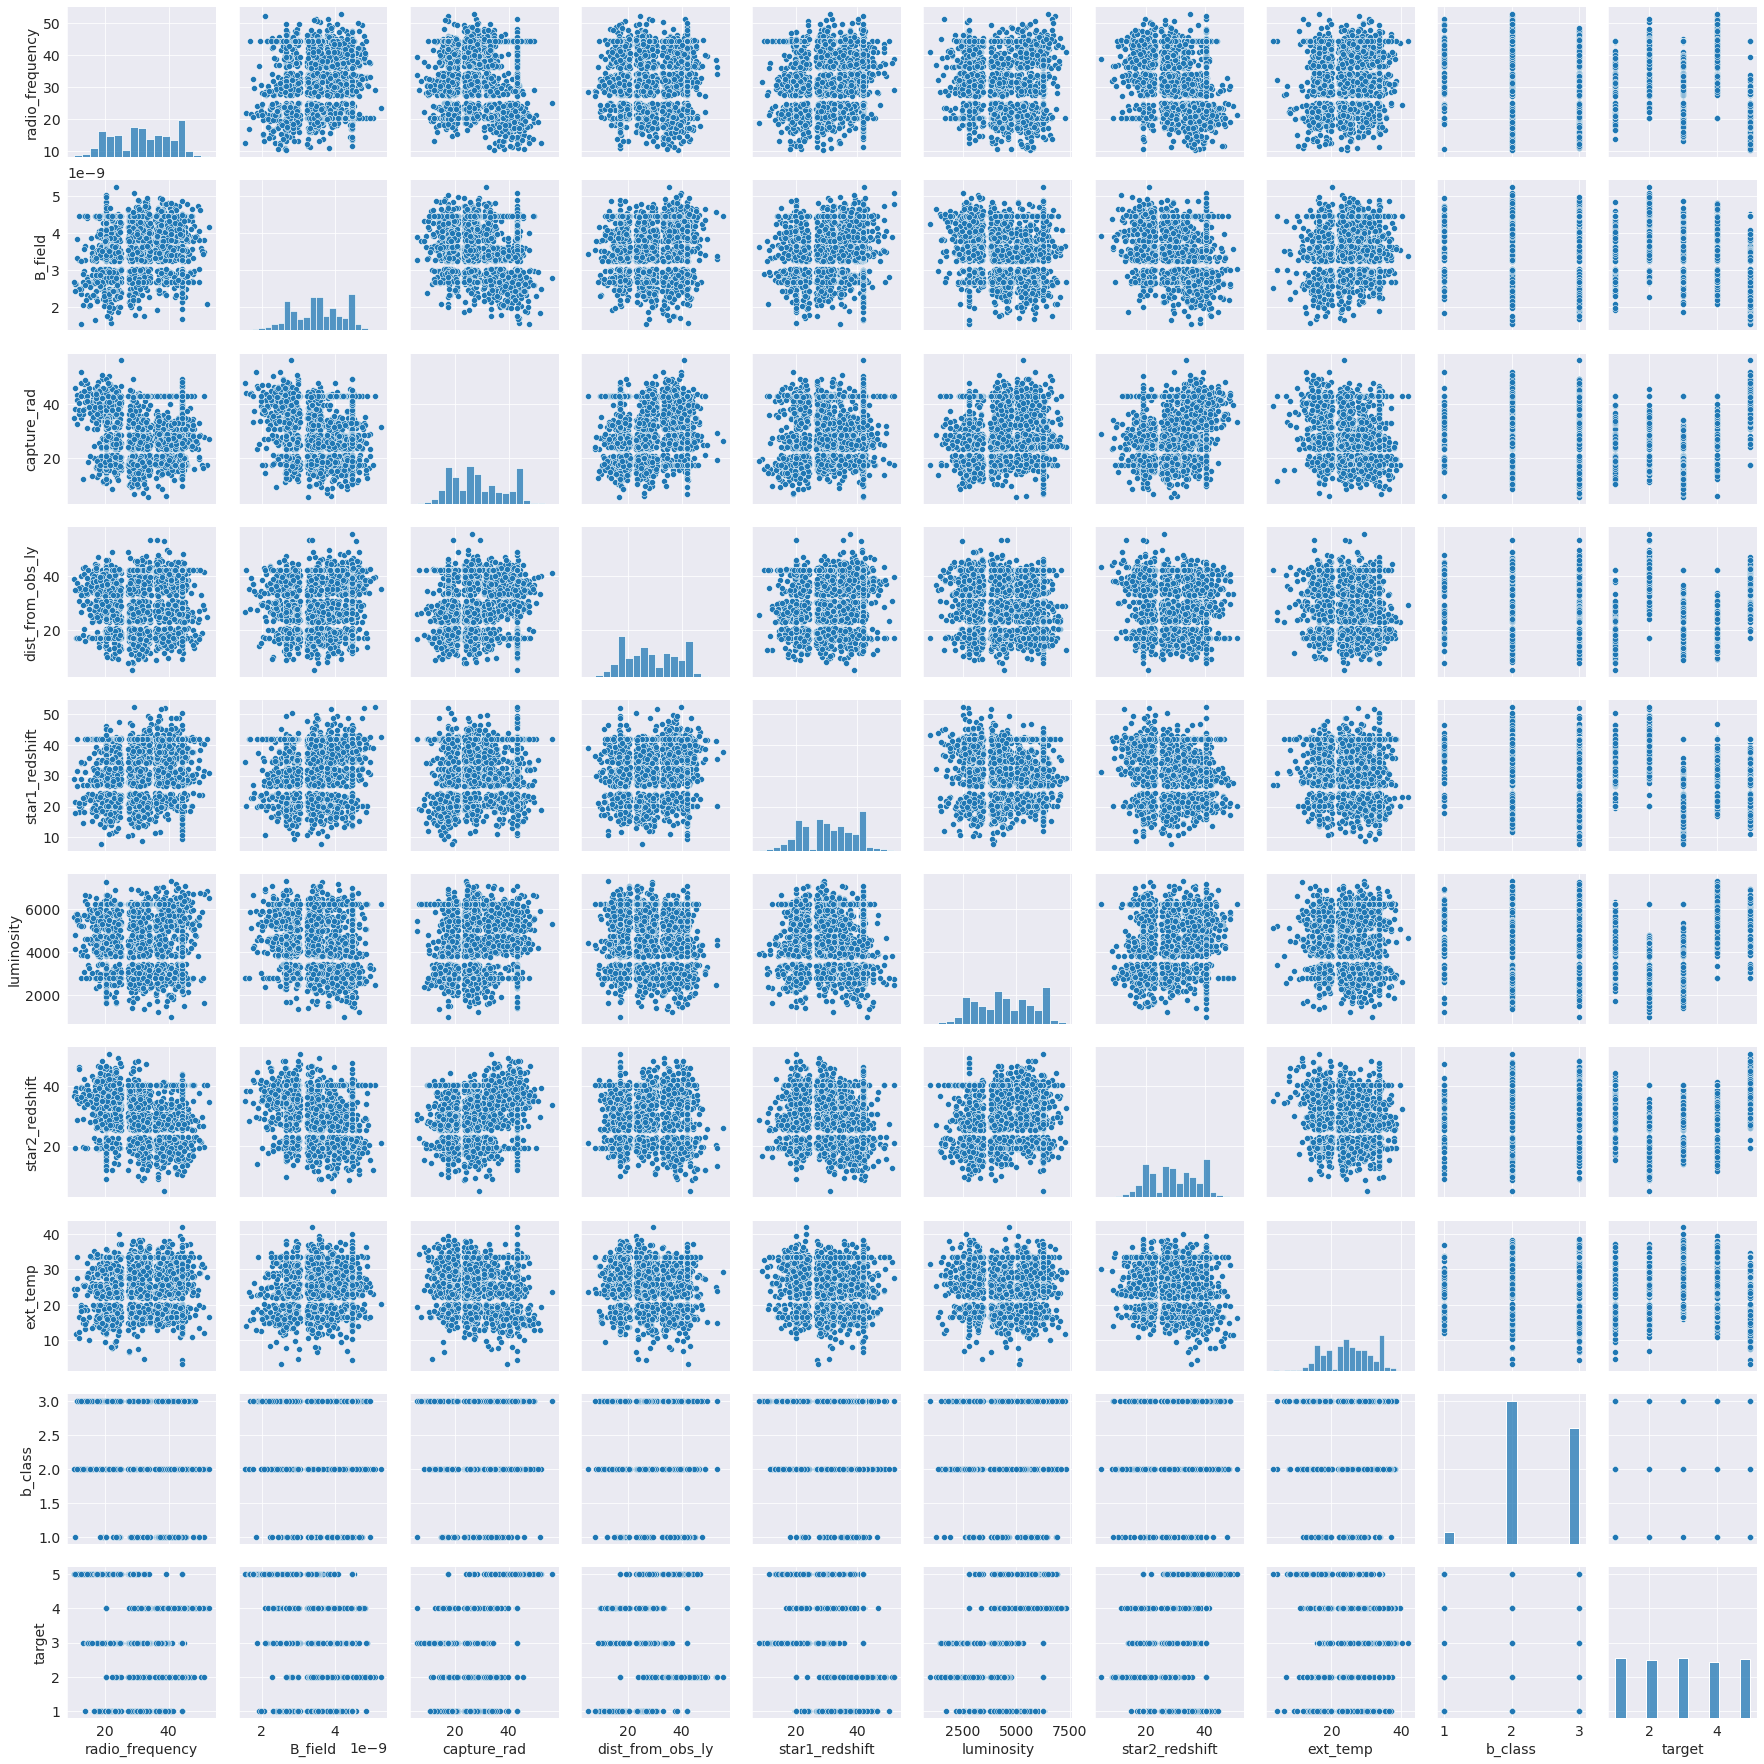

In [ ]:
sns.pairplot(df)

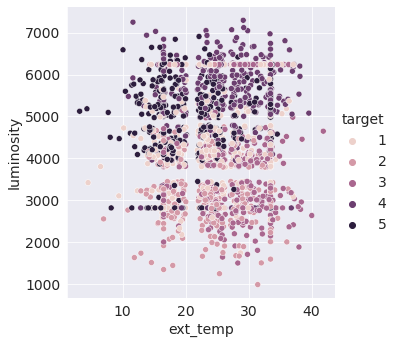

In [ ]:
sns.relplot(x='ext_temp',y= 'luminosity', hue='target' ,data=df)

<Axes: xlabel='b_class', ylabel='star1_redshift'>

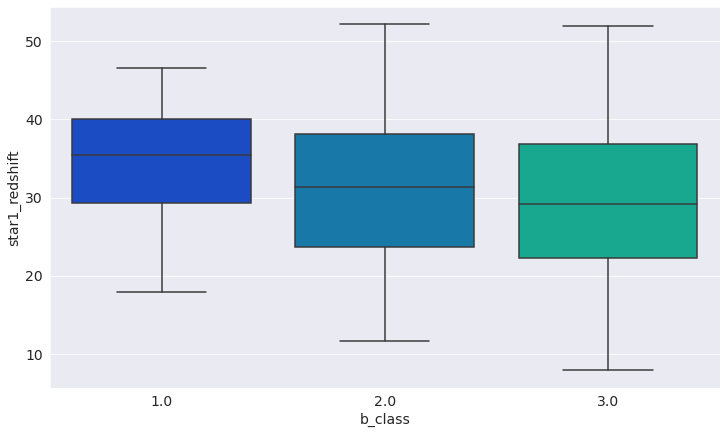

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='b_class',y='star1_redshift',data=df,palette='winter')

In [ ]:
correlation_matrix = df.corr().round(2)
correlation_matrix


,radio_frequency,B_field,capture_rad,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,b_class,target
radio_frequency,1.00,0.16,-0.19,-0.05,0.10,-0.01,-0.19,0.09,-0.12,-0.15
B_field,0.16,1.00,-0.18,0.01,0.16,-0.14,-0.20,0.05,-0.05,-0.28
capture_rad,-0.19,-0.18,1.00,0.16,0.01,0.12,0.20,-0.16,-0.05,0.37
dist_from_obs_ly,-0.05,0.01,0.16,1.00,0.14,-0.09,-0.05,-0.07,-0.02,0.12
star1_redshift,0.10,0.16,0.01,0.14,1.00,-0.08,-0.08,-0.06,-0.12,-0.26
luminosity,-0.01,-0.14,0.12,-0.09,-0.08,1.00,0.14,0.01,0.00,0.32
star2_redshift,-0.19,-0.20,0.20,-0.05,-0.08,0.14,1.00,-0.10,0.07,0.27
ext_temp,0.09,0.05,-0.16,-0.07,-0.06,0.01,-0.10,1.00,0.03,-0.06
b_class,-0.12,-0.05,-0.05,-0.02,-0.12,0.00,0.07,0.03,1.00,0.07
target,-0.15,-0.28,0.37,0.12,-0.26,0.32,0.27,-0.06,0.07,1.00


Imputing Data as ~50% data is missing

1.KNN Imputer




In [ ]:
#clusters are being made so lets try KNNimputing

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
int_col=df.iloc[:,-2]
int_col.values

array([ 3.,  2.,  2., ...,  2.,  3., nan])

In [ ]:
df2=df.copy().drop(['b_class'],axis=1)
df2

,radio_frequency,B_field,capture_rad,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,target
0,28.744706,3.590000e-09,19.592496,NaN,23.994950,NaN,34.939900,25.511543,1
1,44.166331,4.510000e-09,43.004674,28.397134,28.943042,4230.266381,28.181097,26.047880,1
2,30.834897,4.410000e-09,33.429970,NaN,37.999181,6237.993588,29.577628,30.748244,2
3,17.479827,3.540000e-09,12.976150,41.986773,17.683204,NaN,40.623018,29.488469,3
4,30.268452,3.800000e-09,26.458232,11.548628,21.498649,6237.993588,25.976439,27.169169,3
...,...,...,...,...,...,...,...,...,...
1995,41.551013,4.420000e-09,33.146966,24.282921,21.694687,2818.571131,22.299077,NaN,4
1996,31.104158,3.000000e-09,43.004674,16.859181,31.464783,4178.867596,22.679037,24.569472,1
1997,NaN,4.450000e-09,18.849264,18.108120,40.557671,4528.968755,NaN,22.913804,1
1998,37.997708,3.640000e-09,20.748943,39.666448,41.473909,3832.446538,19.432455,25.480769,2


KNN imputing

In [ ]:
imputer = KNNImputer(n_neighbors=8,weights='distance')

In [ ]:
imputed_df2_array=imputer.fit_transform(df2)
imputed_df2=pd.DataFrame(imputed_df2_array)
imputed_df2.columns=df2.columns
imputed_df2

,radio_frequency,B_field,capture_rad,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,target
0,28.744706,3.590000e-09,19.592496,23.474602,23.994950,3193.700424,34.939900,25.511543,1.0
1,44.166331,4.510000e-09,43.004674,28.397134,28.943042,4230.266381,28.181097,26.047880,1.0
2,30.834897,4.410000e-09,33.429970,28.591405,37.999181,6237.993588,29.577628,30.748244,2.0
3,17.479827,3.540000e-09,12.976150,41.986773,17.683204,4556.656281,40.623018,29.488469,3.0
4,30.268452,3.800000e-09,26.458232,11.548628,21.498649,6237.993588,25.976439,27.169169,3.0
...,...,...,...,...,...,...,...,...,...
1995,41.551013,4.420000e-09,33.146966,24.282921,21.694687,2818.571131,22.299077,24.024685,4.0
1996,31.104158,3.000000e-09,43.004674,16.859181,31.464783,4178.867596,22.679037,24.569472,1.0
1997,30.981963,4.450000e-09,18.849264,18.108120,40.557671,4528.968755,32.250241,22.913804,1.0
1998,37.997708,3.640000e-09,20.748943,39.666448,41.473909,3832.446538,19.432455,25.480769,2.0


In [ ]:
imputed_df2.insert(loc = 8,
          column = 'b_class',
          value =int_col.values )

In [ ]:
imputed_df2

,radio_frequency,B_field,capture_rad,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,b_class,target
0,28.744706,3.590000e-09,19.592496,23.474602,23.994950,3193.700424,34.939900,25.511543,3.0,1.0
1,44.166331,4.510000e-09,43.004674,28.397134,28.943042,4230.266381,28.181097,26.047880,2.0,1.0
2,30.834897,4.410000e-09,33.429970,28.591405,37.999181,6237.993588,29.577628,30.748244,2.0,2.0
3,17.479827,3.540000e-09,12.976150,41.986773,17.683204,4556.656281,40.623018,29.488469,3.0,3.0
4,30.268452,3.800000e-09,26.458232,11.548628,21.498649,6237.993588,25.976439,27.169169,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1995,41.551013,4.420000e-09,33.146966,24.282921,21.694687,2818.571131,22.299077,24.024685,2.0,4.0
1996,31.104158,3.000000e-09,43.004674,16.859181,31.464783,4178.867596,22.679037,24.569472,2.0,1.0
1997,30.981963,4.450000e-09,18.849264,18.108120,40.557671,4528.968755,32.250241,22.913804,2.0,1.0
1998,37.997708,3.640000e-09,20.748943,39.666448,41.473909,3832.446538,19.432455,25.480769,3.0,2.0


In [ ]:
imputer2 = KNNImputer(n_neighbors=1)

In [ ]:
imputed_df3_array=imputer2.fit_transform(imputed_df2)


In [ ]:
imputed_df3=pd.DataFrame(imputed_df3_array)


In [ ]:
imputed_df3.columns=df.columns


In [ ]:
sns.pairplot(dft)

In [ ]:
sns.pairplot(imputed_df3)

## Checking Outliers

In [ ]:
column_headers = ['radio_frequency',
 'B_field',
 'capture_rad',
 'dist_from_obs_ly',
 'star1_redshift',
 'luminosity',
 'star2_redshift',
 'ext_temp',
 'b_class']

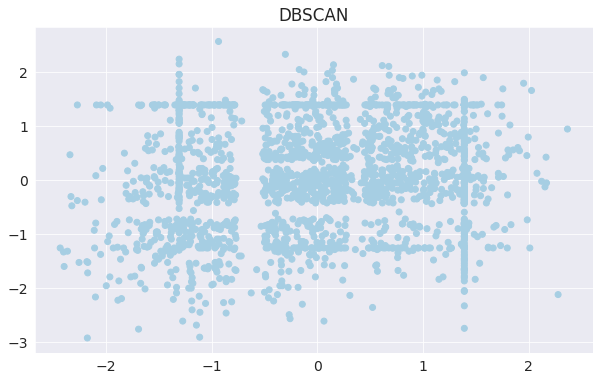

In [ ]:
train_x = imputed_df3[column_headers]
data = imputed_df3
train_y = imputed_df3['target']
y =  train_y
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

dbscan(data, eps= 52, min_samples=11)

Finding Minimal value of eps

In [ ]:
from sklearn.neighbors import NearestNeighbors
import plotly.express as px

neighbors = 11
# X_embedded is your data
nbrs = NearestNeighbors(n_neighbors=neighbors ).fit(data)
distances, indices = nbrs.kneighbors(data)
distance_desc = sorted(distances[:,10], reverse=True)
px.line(x=list(range(1,len(distance_desc )+1)),y= distance_desc )


In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,len(distance_desc)+1),  #x values
                      distance_desc, # y values
                      S=1.0, #parameter suggested from paper
                      curve="convex", #parameter from figure
                      direction="decreasing") #parameter from figure

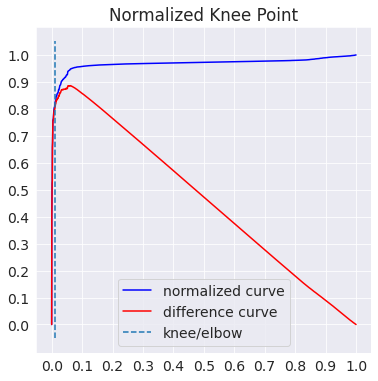

In [ ]:
kneedle.plot_knee_normalized()


In [ ]:
kneedle.knee_y


124.73155184216581

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
clusters = DBSCAN(eps =50
, min_samples = 11).fit(data)
# get cluster labels
clusters.labels_

# check unique clusters
set(clusters.labels_)
from collections import Counter
Counter(clusters.labels_)

Counter({0: 513, 1: 649, 2: 741, -1: 97})

## Deleting Outliers

In [ ]:
# 97 anomalies and 4 Clusters found

In [ ]:
drop_rows1=data[clusters.labels_==-1].index


In [ ]:
data.drop(drop_rows1,axis=0,inplace=True)



In [ ]:
new_train_x=imputed_df3[column_headers]
new_train_y=imputed_df3['target']

In [ ]:
new_train_x

,radio_frequency,B_field,capture_rad,dist_from_obs_ly,star1_redshift,luminosity,star2_redshift,ext_temp,b_class
0,28.744706,3.590000e-09,19.592496,23.474602,23.994950,3193.700424,34.939900,25.511543,3.0
1,44.166331,4.510000e-09,43.004674,28.397134,28.943042,4230.266381,28.181097,26.047880,2.0
2,30.834897,4.410000e-09,33.429970,28.591405,37.999181,6237.993588,29.577628,30.748244,2.0
3,17.479827,3.540000e-09,12.976150,41.986773,17.683204,4556.656281,40.623018,29.488469,3.0
4,30.268452,3.800000e-09,26.458232,11.548628,21.498649,6237.993588,25.976439,27.169169,2.0
...,...,...,...,...,...,...,...,...,...
1995,41.551013,4.420000e-09,33.146966,24.282921,21.694687,2818.571131,22.299077,24.024685,2.0
1996,31.104158,3.000000e-09,43.004674,16.859181,31.464783,4178.867596,22.679037,24.569472,2.0
1997,30.981963,4.450000e-09,18.849264,18.108120,40.557671,4528.968755,32.250241,22.913804,2.0
1998,37.997708,3.640000e-09,20.748943,39.666448,41.473909,3832.446538,19.432455,25.480769,3.0


In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.metrics import accuracy_score

Splitting Data For Testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_train_x, new_train_y, test_size=0.2, random_state=0)

In [ ]:
scaler=StandardScaler()
X_train_scaled=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [ ]:
train=xgb.DMatrix(X_train,label=y_train)
test=xgb.DMatrix(X_test,label=y_test)

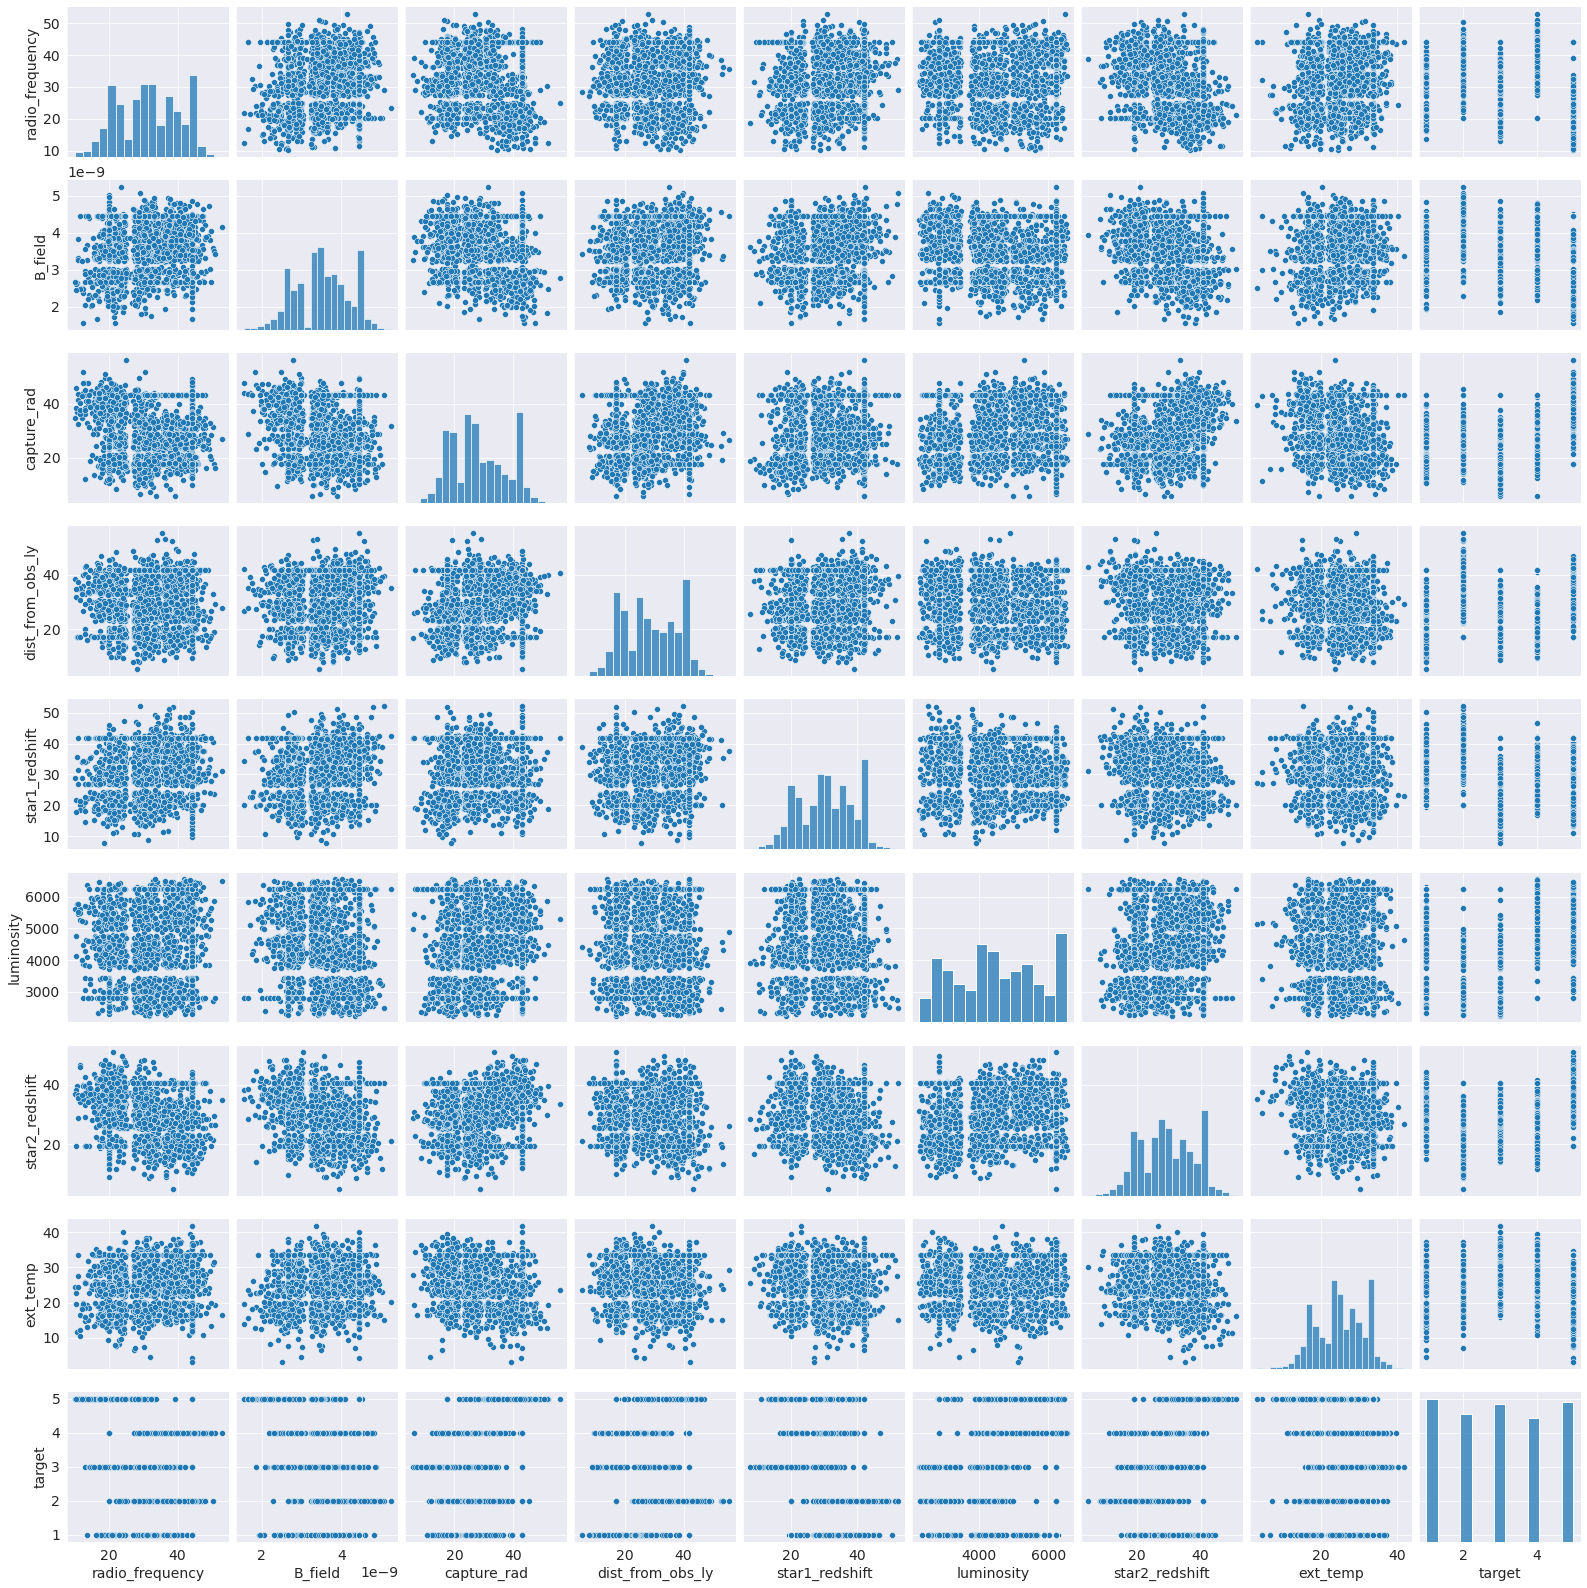

In [ ]:
sns.pairplot(data)

# MODELING

### SVM , Logistic Regression and Neural Network

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier as MLPC

In [ ]:
log_model=LogisticRegression()
svm_model=SVC(C=1.0,kernel='rbf')
nn_model=MLPC(hidden_layer_sizes=(128,128))

In [ ]:
log_model.fit(X_train_scaled,y_train)
svm_model.fit(X_train_scaled,y_train)
nn_model.fit(X_train_scaled,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(128, 128))

In [ ]:
print(log_model.score(X_test_scaled,y_test))
print(svm_model.score(X_test_scaled,y_test))
print(nn_model.score(X_test_scaled,y_test))

0.7085561497326203
0.7352941176470589
0.7192513368983957


### **XGBOOST**

In [ ]:
params={'max_depth':8,'eta':0.2,'objective':'multi:softmax','num_class':6,'min_child_weight':10,'subsample':0.9,'num_parallel_tree':10,'max_bin':100}
epochs = 55

In [ ]:
xgb_model=xgb.train(params ,train, epochs)

In [ ]:
predictions = xgb_model.predict(test)

In [ ]:
accuracy_score(y_test, predictions)

1.0

### **CATBOOST**

In [ ]:
from catboost import CatBoostClassifier
cat_classifier = CatBoostClassifier(learning_rate=0.05,
                          n_estimators=1500,
                          subsample=0.75,
                          max_depth=5,
                          verbose=100,
                          l2_leaf_reg = 7,
                          bootstrap_type="Bernoulli",
                          loss_function='MultiClass')

In [ ]:
cat_classifier.fit(X_train, y_train)

0:	learn: 1.5619280	total: 5.97ms	remaining: 8.95s
100:	learn: 0.6462713	total: 505ms	remaining: 7s
200:	learn: 0.4480249	total: 956ms	remaining: 6.18s
300:	learn: 0.3485422	total: 1.89s	remaining: 7.54s
400:	learn: 0.2927087	total: 3.22s	remaining: 8.83s
500:	learn: 0.2547620	total: 4.54s	remaining: 9.06s
600:	learn: 0.2261173	total: 5.6s	remaining: 8.37s
700:	learn: 0.2028537	total: 6.04s	remaining: 6.89s
800:	learn: 0.1839028	total: 6.54s	remaining: 5.71s
900:	learn: 0.1688672	total: 7s	remaining: 4.65s
1000:	learn: 0.1547714	total: 7.45s	remaining: 3.71s
1100:	learn: 0.1427819	total: 7.92s	remaining: 2.87s
1200:	learn: 0.1318073	total: 8.38s	remaining: 2.09s
1300:	learn: 0.1220655	total: 8.85s	remaining: 1.35s
1400:	learn: 0.1138266	total: 9.29s	remaining: 657ms
1499:	learn: 0.1061520	total: 9.76s	remaining: 0us


In [ ]:
print(cat_classifier.score(X_test,y_test))


0.8582887700534759


### **LGB**

In [ ]:
import lightgbm as lgb

In [ ]:
clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_leaves=60,
    min_child_samples=20,
    max_depth=4
)

In [ ]:
clf.fit(X_train, y_train)


LGBMClassifier(max_depth=4, num_leaves=60, objective='multiclass')

In [ ]:
print(clf.score(X_test,y_test))

0.8770053475935828


### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier=RFC(n_estimators=100,random_state=1,max_depth=8,criterion='gini')
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=1)

In [ ]:
print(classifier.score(X_test,y_test))

0.8342245989304813


## Voting Classifier

Voting Classifier Came up in my mind later on as i researched , if time wouldnt be a constraint, model could have had a increase in accuracy by using Voting CLassifier Algorithm , which is great for applying mutliple models.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier

In [ ]:
eclf = EnsembleVoteClassifier(clfs=[cat_classifier,clf,classifier])

In [ ]:
eclf = eclf.fit(X_train, y_train)

0:	learn: 1.5723069	total: 6.99ms	remaining: 10.5s
100:	learn: 0.6607647	total: 861ms	remaining: 11.9s
200:	learn: 0.4627938	total: 2.17s	remaining: 14.1s
300:	learn: 0.3604000	total: 3.44s	remaining: 13.7s
400:	learn: 0.3003327	total: 4.64s	remaining: 12.7s
500:	learn: 0.2588209	total: 5.13s	remaining: 10.2s
600:	learn: 0.2269265	total: 5.58s	remaining: 8.35s
700:	learn: 0.2016332	total: 6.03s	remaining: 6.88s
800:	learn: 0.1808066	total: 6.47s	remaining: 5.65s
900:	learn: 0.1646511	total: 6.92s	remaining: 4.6s
1000:	learn: 0.1500796	total: 7.37s	remaining: 3.67s
1100:	learn: 0.1367532	total: 7.82s	remaining: 2.83s
1200:	learn: 0.1259419	total: 8.26s	remaining: 2.06s
1300:	learn: 0.1157845	total: 8.71s	remaining: 1.33s
1400:	learn: 0.1072054	total: 9.16s	remaining: 647ms
1499:	learn: 0.0992026	total: 9.59s	remaining: 0us


In [ ]:
X_test_pred=X_test.astype(dtype = object)
predictions = eclf.predict(X_test_pred)

ValueError: ignored

### **Submission**

In [ ]:
index=[]
for i in range(0,500):
  index+=[i]


In [ ]:
index

In [ ]:
dft_matrix=xgb.DMatrix(dft)

In [ ]:
dft_matrix

In [ ]:
model_test_output_xgb=xgb_model.predict(dft_matrix)
model_test_output_cat=cat_classifier.predict(dft)
model_test_output_lgb=clf.predict(dft)
model_test_output_rfc=classifier.predict(dft)

In [ ]:
model_test_output_cattrue=np.zeros(500, dtype=float)

In [ ]:
for i in range(0,500):
  model_test_output_cattrue[i]=model_test_output_cat[i][0]

In [ ]:
submission_df_xgb = pd.DataFrame(data = { 'id': index, 'target': model_test_output_xgb})
result_xgb = submission_df_xgb
submission_df_cat = pd.DataFrame(data = { 'id': index, 'target': model_test_output_cattrue})
result_cat = submission_df_cat
submission_df_lgb = pd.DataFrame(data = { 'id': index, 'target': model_test_output_lgb})
result_lgb = submission_df_lgb
submission_df_rfc = pd.DataFrame(data = { 'id': index, 'target': model_test_output_rfc})
result_rfc = submission_df_rfc
#Transfering integer target to string
result_xgb["target"] = result_xgb["target"].map({1.0:"Alpha Boreas", 2.0:"Beta Eioneous",3.0:"Zeta Draconis",4.0:'Gamma Saggita',5.0:'Alpha Hemithea'})
result_cat["target"] = result_cat["target"].map({1.0:"Alpha Boreas", 2.0:"Beta Eioneous",3.0:"Zeta Draconis",4.0:'Gamma Saggita',5.0:'Alpha Hemithea'})
result_lgb["target"] = result_lgb["target"].map({1.0:"Alpha Boreas", 2.0:"Beta Eioneous",3.0:"Zeta Draconis",4.0:'Gamma Saggita',5.0:'Alpha Hemithea'})
result_rfc["target"] = result_rfc["target"].map({1.0:"Alpha Boreas", 2.0:"Beta Eioneous",3.0:"Zeta Draconis",4.0:'Gamma Saggita',5.0:'Alpha Hemithea'})


In [ ]:
result_cat


,id,target
0,0,Alpha Hemithea
1,1,Alpha Hemithea
2,2,Gamma Saggita
3,3,Alpha Hemithea
4,4,Zeta Draconis
...,...,...
495,495,Alpha Boreas
496,496,Gamma Saggita
497,497,Gamma Saggita
498,498,Beta Eioneous


In [ ]:
result_xgb


In [ ]:
result_lgb

,id,target
0,0,Alpha Hemithea
1,1,Alpha Hemithea
2,2,Gamma Saggita
3,3,Alpha Hemithea
4,4,Zeta Draconis
...,...,...
495,495,Alpha Boreas
496,496,Gamma Saggita
497,497,Gamma Saggita
498,498,Beta Eioneous


In [ ]:
result_rfc

In [ ]:
result_xgb.rename(columns = {'target':'target(Black Hole)'}, inplace = True)
result_cat.rename(columns = {'target':'target(Black Hole)'}, inplace = True)
result_lgb.rename(columns = {'target':'target(Black Hole)'}, inplace = True)
result_rfc.rename(columns = {'target':'target(Black Hole)'}, inplace = True)

In [ ]:
import os
os.makedirs('submissions', exist_ok=True)

In [ ]:
result_xgb.to_csv('submissions/submissions_xgb.csv',index = False)
result_cat.to_csv('submissions/submissions_cat.csv',index = False)
result_lgb.to_csv('submissions/submissions_lgb.csv',index = False)

In [ ]:
result_rfc.to_csv('submissions/submissions_rfc.csv',index = False)
